**Clustering images**

Machine learning can also be used on images. One method is clustering. Clustering is a form of unsupervised learning in which you seperate a large set of data into smaller groups based on distaces between them. In terms of images, clustering can be used to reduce the number of colours used in an image.

In this exercise we will demonstrate how clustering can be used to measure the size of different dermatological features.



Let's start by loading our first image from our directory and examining it's features:

In [53]:
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole.jpg") #make sure to specify your own working directory
img = np.array(img) #we need to first convert the image to a numpy array to ensure we can specify its dimensions 
print('Shape is', img.shape)
print("Size is", img.size)

Shape is (450, 600, 3)
Size is 810000


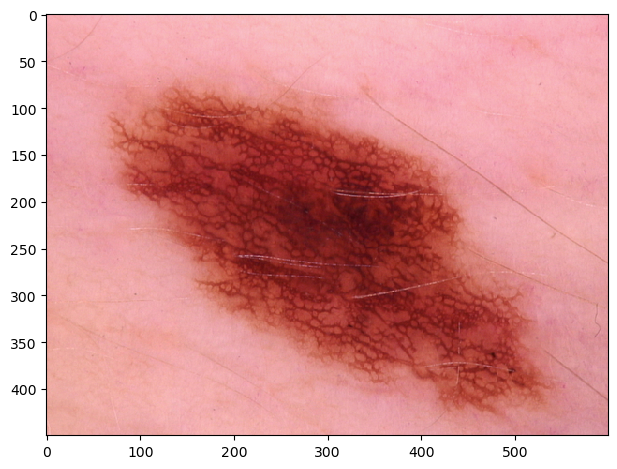

In [55]:
%matplotlib inline
io.imshow(img)
plt.show()

At the moment, the image is in 3 dimensions: 450 (height) x 600 (width) x 3 (colour). Color is 3 corresponding to RGB (red, green, blue). We want to flatten the image to two dimensional array (pixel x colour). 

We then want to put this into a panda data frame for better plotting and processing. The data frame will have four columns: Red, Green, Blue and Colour - indicating the hex code of the pixel.

In [57]:
img = np.array(img, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img.shape)  # Get the current shape
img_array = np.reshape(img, (w * h, d))  # Reshape to to 2D

#put into pandas data frame 
from pandas import DataFrame

pixels = DataFrame(img_array, columns=["Red", "Green", "Blue"])

from matplotlib import colors

pixels["colour"] = [colors.to_hex(p) for p in img_array]
print(pixels)

             Red     Green      Blue   colour
0       0.949020  0.662745  0.698039  #f2a9b2
1       0.964706  0.678431  0.713725  #f6adb6
2       0.964706  0.678431  0.713725  #f6adb6
3       0.964706  0.686275  0.717647  #f6afb7
4       0.968627  0.690196  0.705882  #f7b0b4
...          ...       ...       ...      ...
269995  0.847059  0.572549  0.611765  #d8929c
269996  0.850980  0.576471  0.607843  #d9939b
269997  0.847059  0.572549  0.603922  #d8929a
269998  0.847059  0.564706  0.607843  #d8909b
269999  0.850980  0.568627  0.611765  #d9919c

[270000 rows x 4 columns]


**Exploring the data**

It is useful to plot the data before running the clustering.

Since we have a high amount of pixels (810000) running the algorithm may be slow. Therefore we can run it over a small subset of data.

In [59]:
pixels_sample = pixels.sample(frac=0.05) #look at 5% of the data

Since RGB pixels are a 3D dataset, we will plot three, 2D plots of the pairs red/green, red/blue and green/blue. 

To make our lives easier, we can define a function plot_colours() which will plot the three pairs of columns against each other.  To make the plots visually useful we will also colour each point in the plot with the colour of the pixel it came from using our fourth column, 'Colour'.

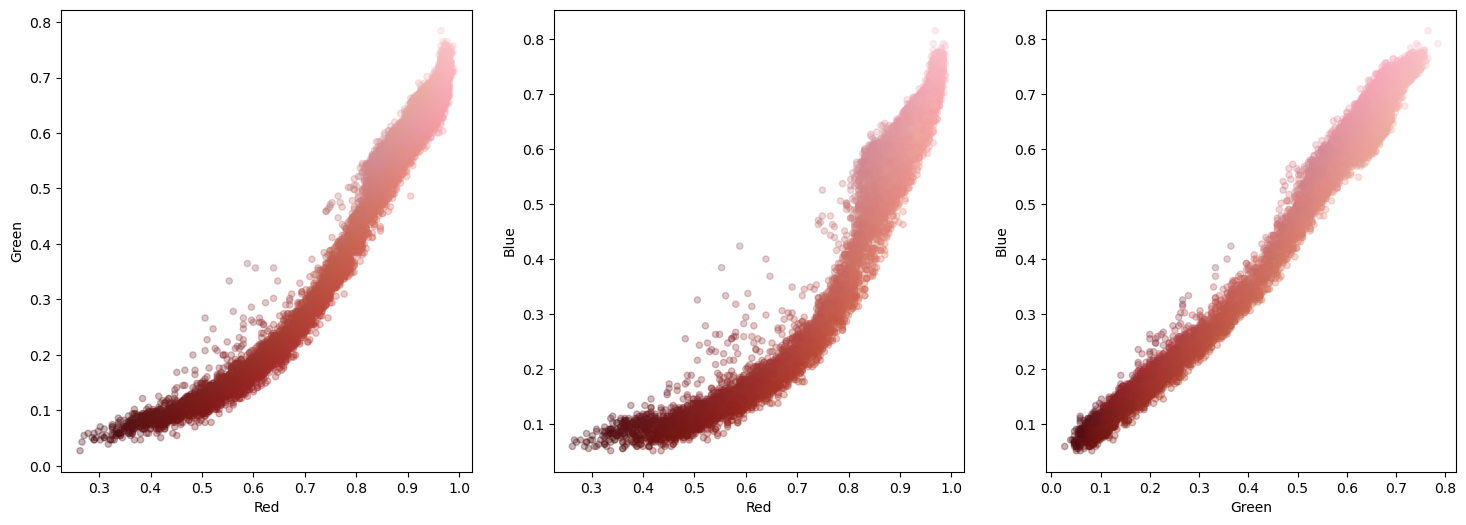

In [77]:
import matplotlib.pyplot as plt


def plot_colours(df, c1, c2, c3):
    """
    Given a DataFrame and three column names,
    plot the pairs against each other
    """
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    df.plot.scatter(c1, c2, c=df["colour"], alpha=0.3, ax=ax[0])
    df.plot.scatter(c1, c3, c=df["colour"], alpha=0.3, ax=ax[1])
    df.plot.scatter(c2, c3, c=df["colour"], alpha=0.3, ax=ax[2])


plot_colours(pixels_sample, "Red", "Green", "Blue")
plt.show()

**NOTE** *NOT SURE WHAT TO INTERPRET FROM THESE GRAPHS YET*

Sometimes viewing the data in 3D can help since planar projections can lose some nuances of the data. Display 3D plots using the mplot3d package.

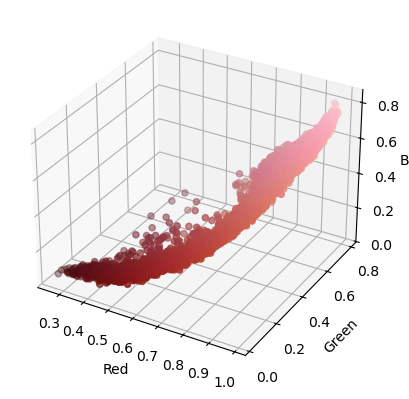

In [83]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.scatter(pixels_sample["Red"], pixels_sample["Green"], pixels_sample["Blue"], c=pixels_sample["colour"])
plt.show()

**Assigning points to clusters**

Now we can begin the clustering. We will be using a method called **k-means clustering**. It works by initialising K cluster centres, assigning each data point (pixel in this case) to the nearest centre. It then works through the datat set, assigning each pixel and updating the clusters if needed. The process continues until no more updates to the clusters are required. 

We can run the clustering and display our cluster centres using the code below:

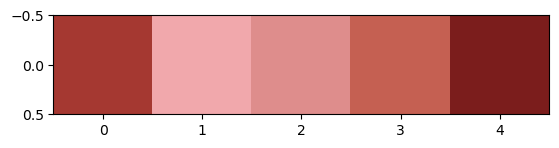

In [133]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init="auto").fit(pixels_sample[["Red", "Green", "Blue"]])
plt.imshow([kmeans.cluster_centers_])
plt.show()

Now we have our clusters which we can use as our representative clusters for the image. We can now go through the original image and assign each pixle to a cluster that it is nearest to.

In [135]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels

array([1, 1, 1, ..., 2, 2, 2])

To quantify these predictions we can plot a bar graph to show how many pixles are in each cluster 

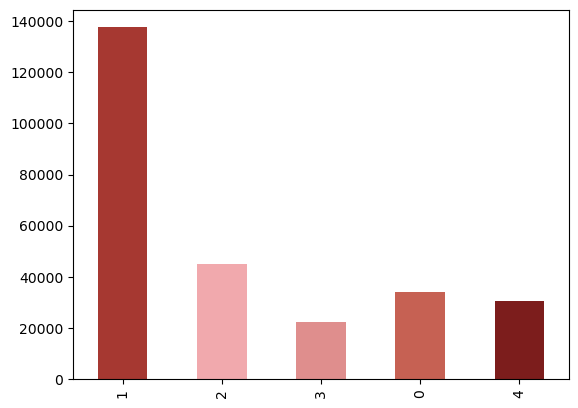

In [137]:
from pandas import DataFrame, Series
%matplotlib inline

Series(labels).value_counts(sort=False).plot.bar(color=kmeans.cluster_centers_)
plt.show()

To assess how well the algorithim has clustered the images, we can plot the clustered pixels next to the original image to obsever the differences. 

First we need to convert our clustered pixels back to a 3D array (width x height x colour):

In [139]:
reduced = np.array([kmeans.cluster_centers_[p] for p in labels]).reshape(original_shape)

We can then plot the images next to eachother

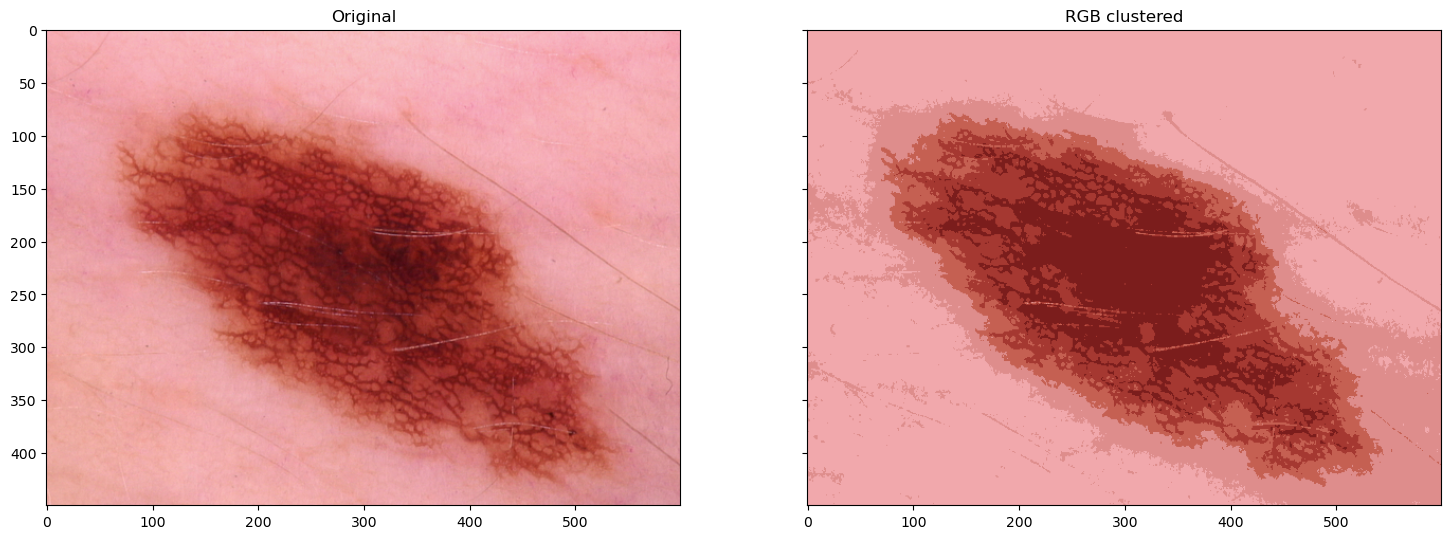

In [141]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
axarr[0].imshow(img)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")
plt.show()

Here it has a done a pretty good job at identfying the main darker spots, but finer features such as hair are undefined. We could try to improve this by increasing the number of clusters.

1. What number of clusters do you think if sufficient to define all features?
2. Set the number of clusters to 2. Does this sufficiently distinguish between mole and not mole?

 **Different colour space**

 **NOTE** *NEED TO ADD MENTION OF DIFFERENT COLOURING METHODS*